In [2]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/db/fc/10b7d339ccf6725e13408d76fb1e944f512590a949af426503c38d4af712/yfinance-0.2.41-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 13.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for html5lib>=1.1 from https://files.pythonhosted.org/packages/6c/dd/a834df6482147d48e225a49515aabc28974a

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

## 1. Data Feteching from Yahoo Finance

In [10]:
# Get the data for tatamotors
ticker = "NFLX"  

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,529.929993,540.500000,527.030029,539.419983,539.419983,3938600
2021-04-05,540.010010,542.849976,529.229980,540.669983,540.669983,3355900
2021-04-06,544.809998,554.169983,543.299988,544.530029,544.530029,3474200
2021-04-07,543.500000,549.640015,541.450012,546.989990,546.989990,2151300
2021-04-08,551.130005,556.900024,547.570007,554.580017,554.580017,4309800


## 2. Select the Target Variable and Clean the data

In [12]:
# Select the Target Varibale Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


## 2.1 Plot the time series

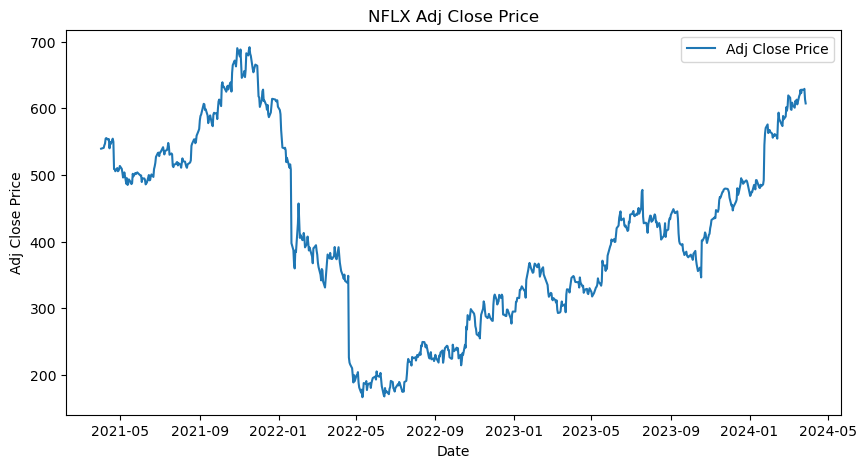

In [13]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('NFLX Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


### 2.2 Decomposition of Time series

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
df.columns


Index(['Adj Close'], dtype='object')

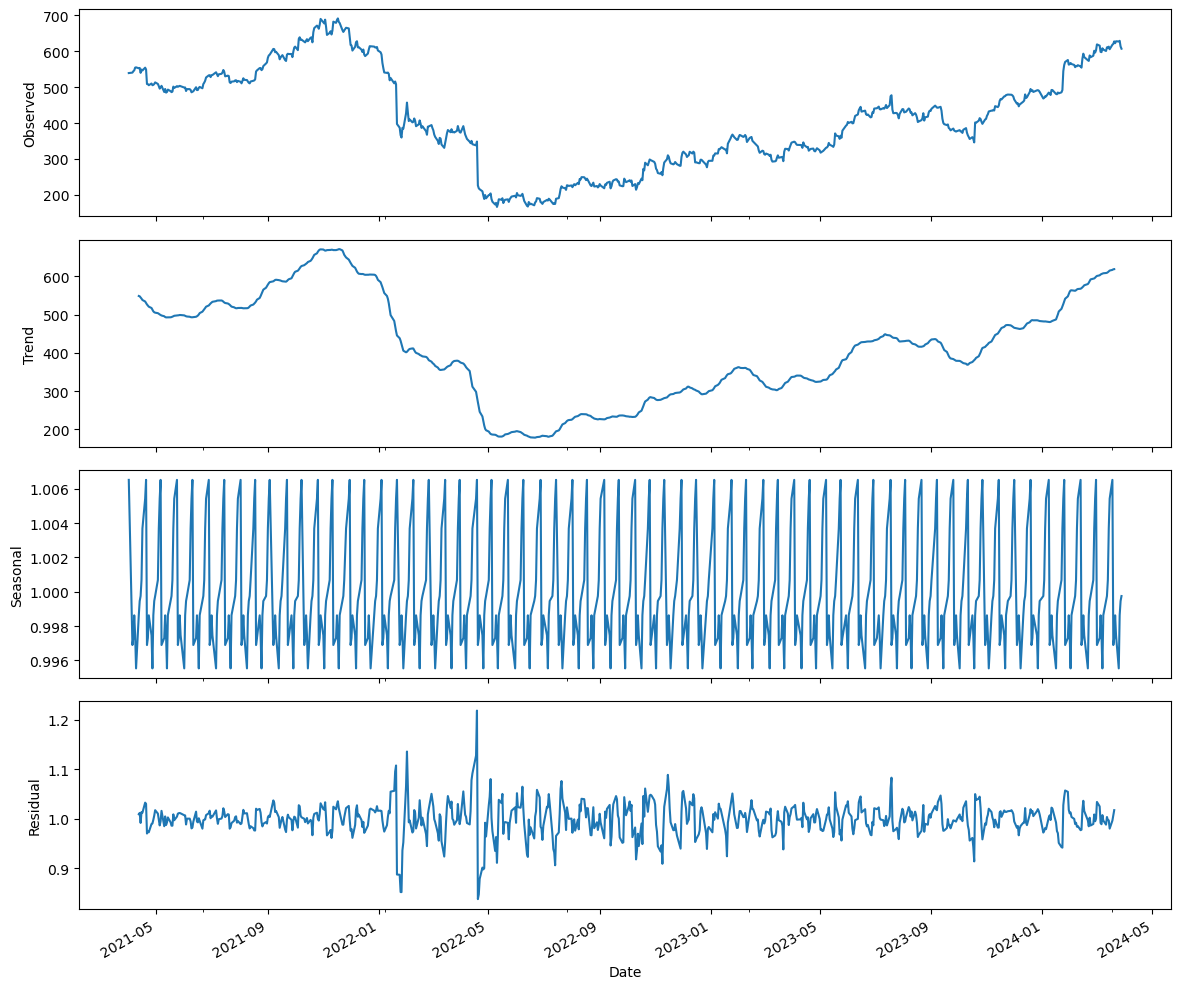

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [17]:
# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

### 3. Univariate Forecasting - Conventional Models/Statistical Models


### 3.1 HW Model

In [20]:
monthly_data = df.resample("M").mean()


In [21]:
# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

In [22]:
len(monthly_data), len(train_data)

(36, 28)

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data, seasonal='mul', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

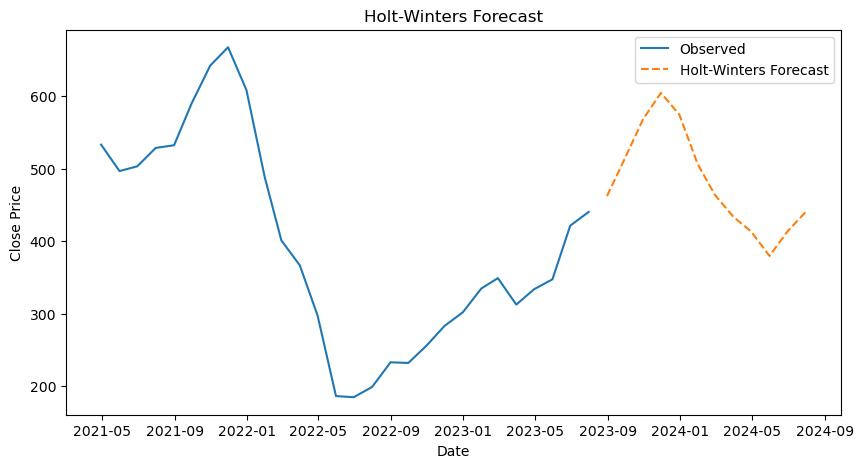

In [24]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [25]:
# Forecast for the next year (12 months)
y_pred = holt_winters_model.forecast(8)

In [26]:
len(test_data), len(y_pred)

(8, 8)

In [27]:
y_pred, test_data

(2023-08-31    462.295560
 2023-09-30    513.926557
 2023-10-31    568.549895
 2023-11-30    604.551883
 2023-12-31    574.550028
 2024-01-31    506.183499
 2024-02-29    463.804336
 2024-03-31    433.705052
 Freq: M, dtype: float64,
              Adj Close
 Date                  
 2023-08-31  424.058697
 2023-09-30  407.321997
 2023-10-31  384.119091
 2023-11-30  455.715713
 2023-12-31  474.059500
 2024-01-31  505.004758
 2024-02-29  575.379001
 2024-03-31  614.007010)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, y_pred)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 124.52457318909458
MAE: 108.95678617762033
MAPE: nan
R-squared: -1.7020498604221825


In [29]:
# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)

In [30]:
holt_winters_forecast


2023-08-31    462.295560
2023-09-30    513.926557
2023-10-31    568.549895
2023-11-30    604.551883
2023-12-31    574.550028
2024-01-31    506.183499
2024-02-29    463.804336
2024-03-31    433.705052
2024-04-30    413.375318
2024-05-31    379.596591
2024-06-30    413.267668
2024-07-31    440.328001
2024-08-31    462.295560
2024-09-30    513.926557
2024-10-31    568.549895
2024-11-30    604.551883
2024-12-31    574.550028
2025-01-31    506.183499
2025-02-28    463.804336
2025-03-31    433.705052
Freq: M, dtype: float64

### 3.2 ARIMA Montly Data

In [32]:
monthly_data.columns


Index(['Adj Close'], dtype='object')

In [36]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [37]:
from pmdarima import auto_arima

In [38]:
# Fit auto_arima model
arima_model = auto_arima(train_data['Adj Close'], 
                         seasonal=True, 
                         m=12,  # Monthly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -137.717
Date:                Mon, 22 Jul 2024   AIC                            279.434
Time:                        10:56:15   BIC                            282.026
Sample:                    04-30-2021   HQIC                           280.205
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5798      0.145      3.988      0.000       0.295       0.865
sigma2      1552.1418    481.812      3.221      0.001     607.808    2496.475
Ljung-Box (L1) (Q):                   0.21   Jarque-

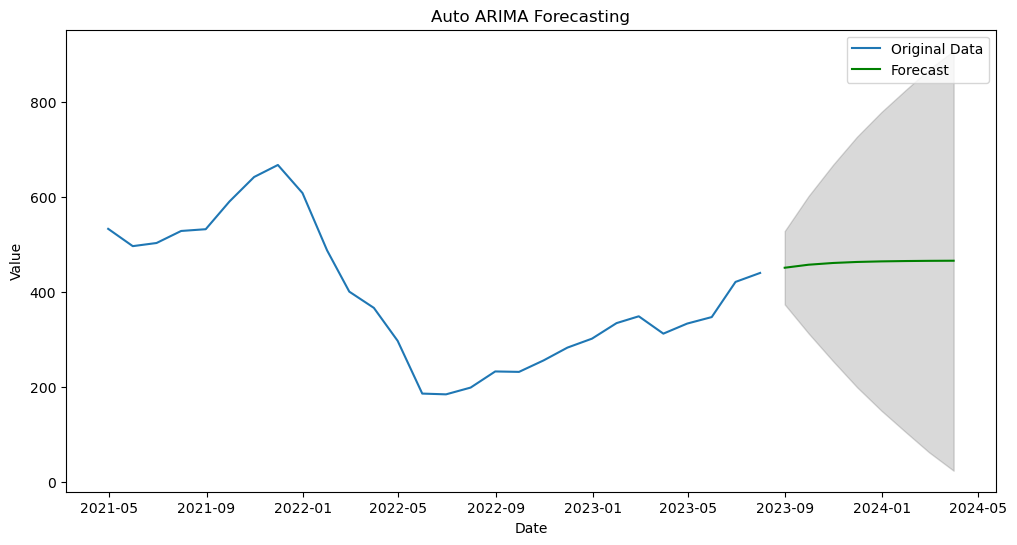

In [39]:
# Number of periods to forecast
n_periods = 8

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.fill_between(forecast.index, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()


In [40]:
len(forecast)


8

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

RMSE: 74.87245326646395
MAE: 58.620242960321754
MAPE: nan
R-squared: 0.023151167309856224


### 3.3 ARIMA Daily Data


In [42]:
daily_data= df.copy()


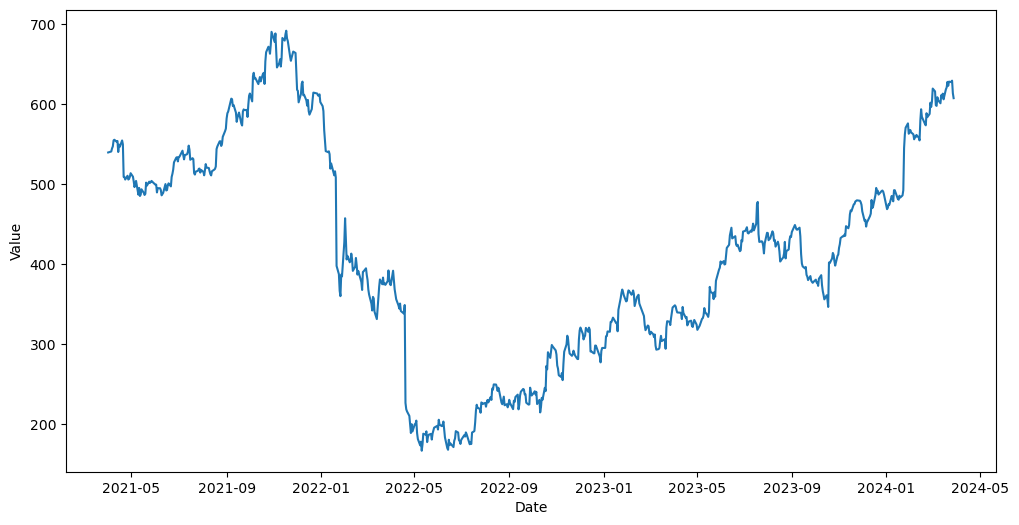

In [43]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [44]:
# Fit auto_arima model
arima_model = auto_arima(daily_data['Adj Close'], 
                         seasonal=True, 
                         m=7,  # Weekly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

In [45]:
# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  753
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2878.870
Date:                Mon, 22 Jul 2024   AIC                           5763.741
Time:                        10:58:00   BIC                           5777.609
Sample:                             0   HQIC                          5769.084
                                - 753                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8172      0.101     -8.055      0.000      -1.016      -0.618
ma.L1          0.8823      0.085     10.419      0.000       0.716       1.048
sigma2       123.7948      1.616     76.590      0.0

In [46]:
# Generate in-sample predictions
fitted_values = arima_model.predict_in_sample()

In [47]:
fitted_values


Date
2021-04-01      0.000000
2021-04-05    539.423634
2021-04-06    540.734297
2021-04-07    544.692096
2021-04-08    546.991960
                 ...    
2024-03-22    620.922829
2024-03-25    629.931978
2024-03-26    625.728438
2024-03-27    630.883687
2024-03-28    611.056820
Name: predicted_mean, Length: 753, dtype: float64

In [48]:
# Number of periods to forecast
n_periods = 60  # For example, forecast the next 30 days

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)


/Users/kirthanshaker/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kirthanshaker/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [49]:
len(forecast)


60

In [50]:
len(future_dates)


NameError: name 'future_dates' is not defined

In [51]:
# Create future dates index
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Convert forecast to a DataFrame with future_dates as the index
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

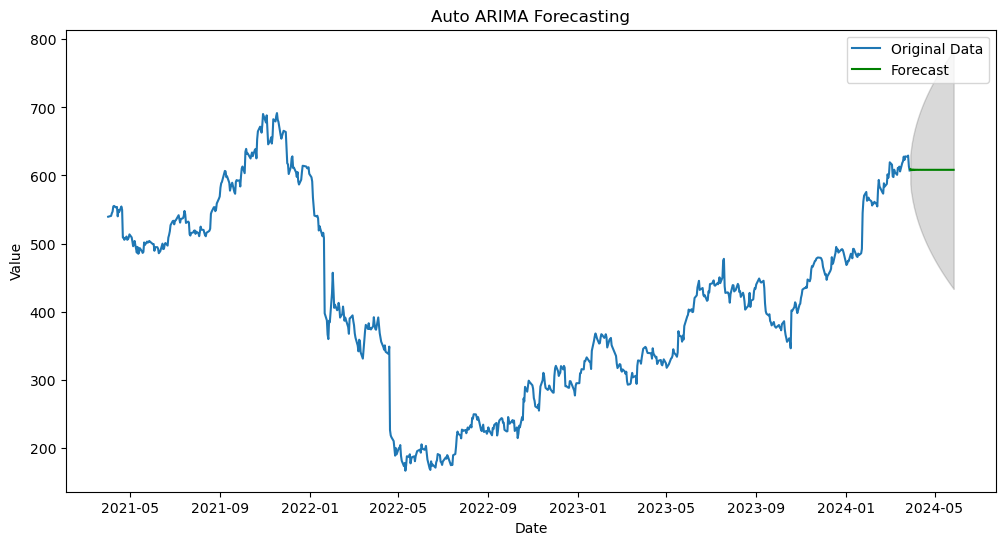

In [52]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates, 
                 conf_int_df['lower_bound'], 
                 conf_int_df['upper_bound'], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

# 2. Multivariate Forecasting - Machine Learning Models

In [57]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [ ]:
data.head()

In [59]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Adj Close') and target ('Adj Close')
features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target


In [60]:
import numpy as np

# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (723, 30, 6)
Shape of y: (723,)


In [63]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1790 - val_loss: 0.0080
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0154 - val_loss: 0.0020
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0093 - val_loss: 0.0048
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0090 - val_loss: 0.0024
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077 - val_loss: 0.0044
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0072 - val_loss: 0.0023
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0068 - val_loss: 0.0033
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0075 - val_loss: 0.0037
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0075 - val_loss: 0.0051
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0077 - val_loss: 0.0042
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0079 - val_loss: 0.0025
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0063

In [64]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [65]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 413.05347177522526, True Value: 433.67999267578125
Prediction: 416.07711494029354, True Value: 439.8800048828125
Prediction: 419.69536372640687, True Value: 448.67999267578125
Prediction: 423.8052345691831, True Value: 445.760009765625
Prediction: 428.0139715124569, True Value: 443.1400146484375
Prediction: 431.53316632899805, True Value: 442.79998779296875
Prediction: 434.4720648856746, True Value: 445.3599853515625
Prediction: 437.01718986203196, True Value: 434.69000244140625
Prediction: 438.40701396426084, True Value: 412.239990234375
Prediction: 436.8014535413895, True Value: 400.489990234375


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 25.969695836084657
MAE: 21.066076936053747
MAPE: 4.461680819918688
R-squared: 0.8967811984445718


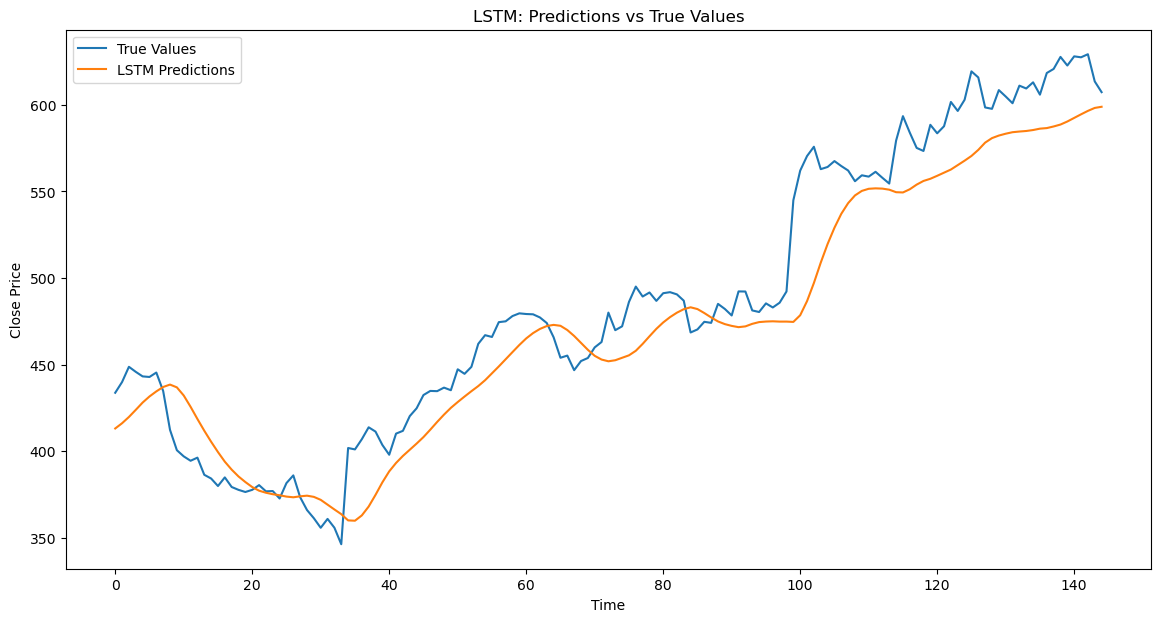

In [67]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#  Tree Based Models

In [68]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np


In [69]:
import numpy as np

def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.
    
    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]
    
    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Adj Close')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)

In [70]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [71]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')


MSE (Decision Tree): 0.0019143371386246416


In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.043753138614557034
MAE: 0.02327028080427119
MAPE: 208280.51366489148
R-squared: 0.972984548347052


In [73]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.000913398187787789


In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')


RMSE: 0.03022247818739868
MAE: 0.017499759083036248
MAPE: 201042.13224578265
R-squared: 0.9871099692503486


In [75]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.13136756415796125, True Value: 0.10993299169044907
Prediction: 0.48284853110484294, True Value: 0.4514772141190446
Prediction: 0.4007652399375706, True Value: 0.40209778428629406
Prediction: 0.6887992496203311, True Value: 0.698945362428477
Prediction: 0.37421003264495467, True Value: 0.3445328327703898
Prediction: 0.3723825332935665, True Value: 0.3798256224727231
Prediction: 0.6692111149233232, True Value: 0.6710956619053002
Prediction: 0.873315337574997, True Value: 0.899699227695916
Prediction: 0.05052160240404058, True Value: 0.04604812705425204
Prediction: 0.3076410827988846, True Value: 0.3026346013282687


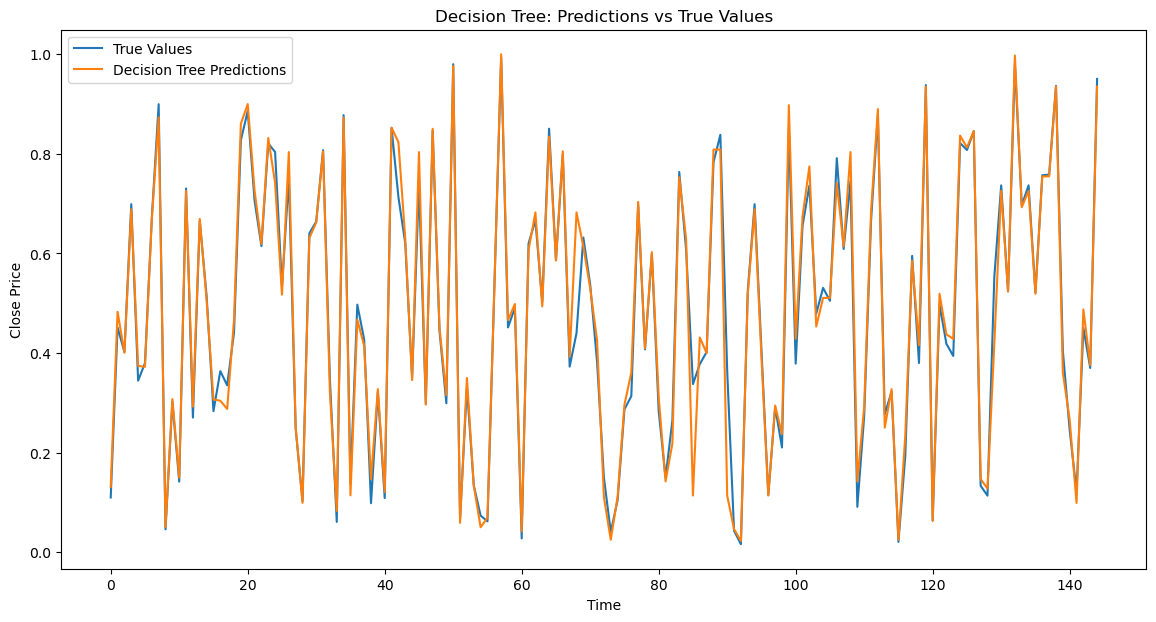

In [76]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [77]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")



Random Forest Predictions vs True Values:
Prediction: 0.11397663463827562, True Value: 0.10993299169044907
Prediction: 0.45409427126764135, True Value: 0.4514772141190446
Prediction: 0.407211988762895, True Value: 0.40209778428629406
Prediction: 0.6923625718512586, True Value: 0.698945362428477
Prediction: 0.37116177499694136, True Value: 0.3445328327703898
Prediction: 0.3741159731855222, True Value: 0.3798256224727231
Prediction: 0.6738646847630424, True Value: 0.6710956619053002
Prediction: 0.8875230186027558, True Value: 0.899699227695916
Prediction: 0.04782228977570521, True Value: 0.04604812705425204
Prediction: 0.3024527965712863, True Value: 0.3026346013282687


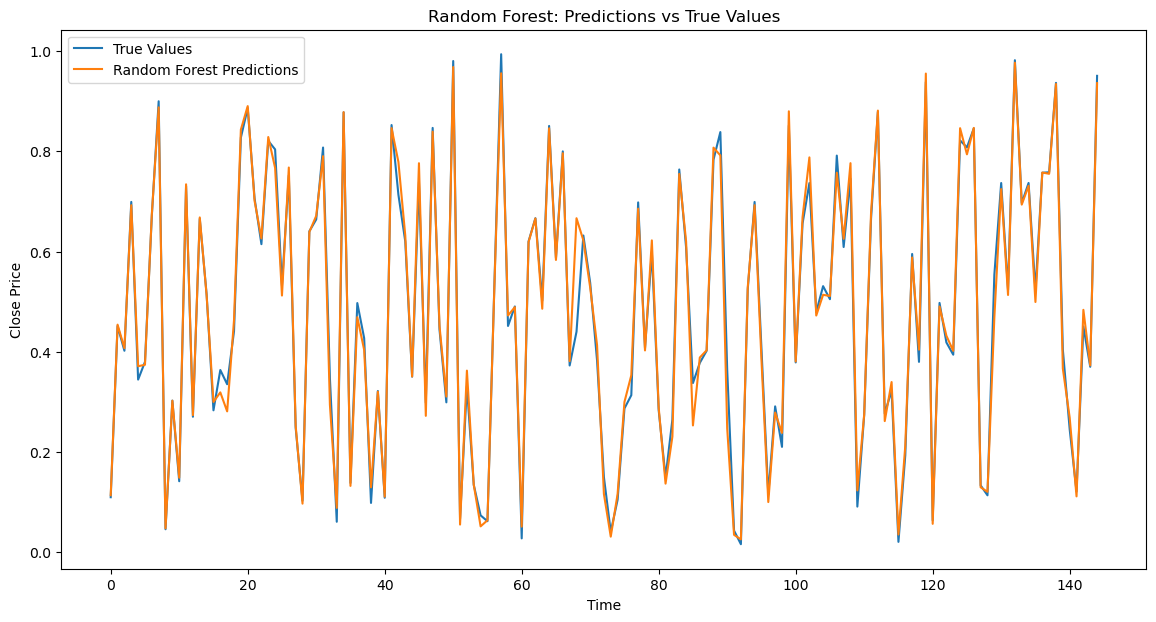

In [78]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

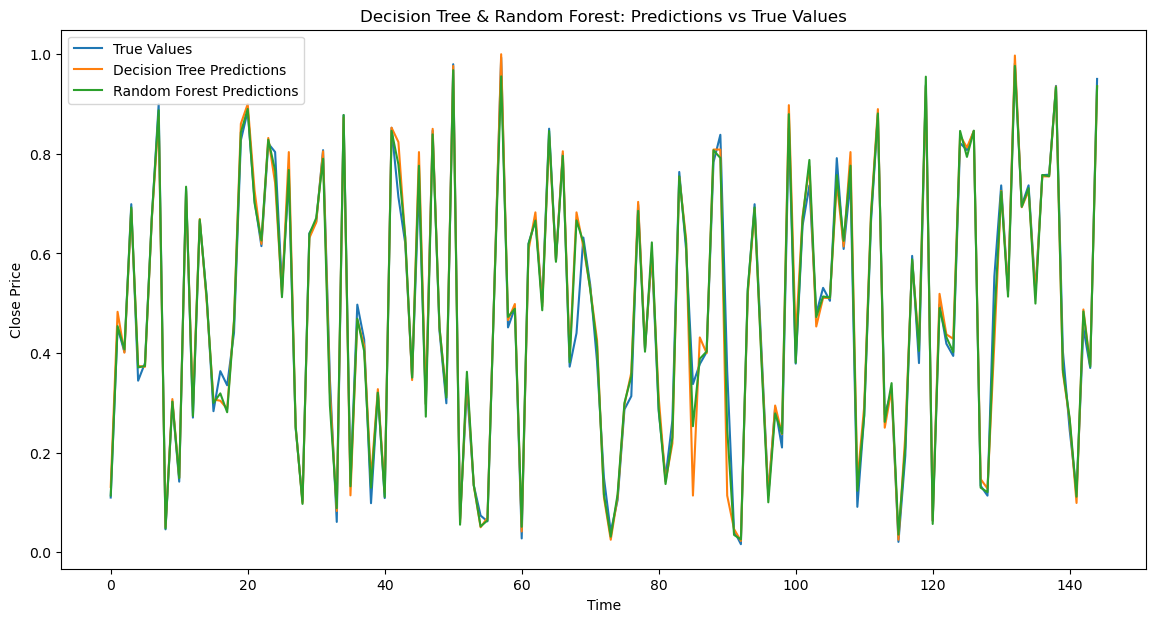

In [79]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()